In [180]:
import matplotlib.pyplot as plt
import numpy as np

seed = 0
rng = np.random.default_rng(seed)

# I. Simulate two-choise task data based on RL updating rule 




### $$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha(R+ \gamma \max_aQ(s_{t+1}, a) - Q(s_t, a_t))$$

## A two-choice decision making task (Two-armed Bandit Problem )

### 1. The reward is given based on $p$, 
$p$: The probability of getting a reward

$1-p$: The probaility of not getting a reward


### 2. Action-State value $Q(s,a)$ update: Q-learning


#### 2.1. Define the states: 
  There is only one state $s_0$ for this task. All you need to make a decision no matter what timestep you are. 

 So you only need to know: $Q(s=s_0, a)$

####  $$Q(s_0,a_t) \leftarrow Q(s_0,a_t) + \alpha(R  - Q(s_0, a_0))$$

#### 2.2. Action-selection policy 
There are two possible actions: choose left or choose right

Given the $Q$-value ($Q(s,a)$), you need to choose a action $a_i$ based on Softmax function: 

#### $$P(a_i| s_0) = \frac{-\beta\exp(Q(a_i,s_0))}{\sum_j \exp( -\beta Q(a_j,s_0))}$$


### 3. The data should include States and actions
we want the states, actions during the learning process, which is similar as the $Q$-value update process. 
#### update of state and actions during the learning process

In [181]:
def generate_data_2choice(rng, alpha, beta, n=100, p_r=None, Q_initial = None):
    if p_r is None:
        p_r = [0.4, 0.6]
    actions = np.zeros(n, dtype="int")
    rewards = np.zeros(n, dtype="int")
    
    # create a table store the update process of q-value, which has two actions, 1 state.
    Qs = np.zeros((n, 2))  # n*2, n: learning process; 2: number of actions,
    prob_as = np.zeros((n,2))
    # Initialize Q table
    if Q_initial is None:
        Q = np.array([0.5, 0.5])  # same q-value for each action 
    else:
        Q = np.array(Q_initial)
    Qs[0,:] = Q.copy()
    prob_as[0,:] =Q.copy()
    for i in np.arange(1, n): # for n-steps learning(q-value updating) 
        # prob_a: action-selecion probability, based on Softmax transformation
        exp_Q = np.exp( -beta*Q)  # beta 
        prob_a = exp_Q / np.sum(exp_Q)
        prob_as[i,:] = prob_a
        # Simulate choice based on prob_a
        a = rng.choice([0, 1], p=prob_a)

        # Simulate reward based on p_r, and action
        r = rng.random() < p_r[a]
        print(i, Q, exp_Q, prob_a, a, r)
        # Update Q table
        Q[a] = Q[a] + alpha * (r - Q[a])

        # Store values
        actions[i] = a
        rewards[i] = r
        Qs[i,:] = Q.copy()

    return actions, rewards, Qs,prob_as


def plot_rl_simulation(actions, rewards, Qs,prob_as):
    # plot simulated q-learning update for two-choise task (2-armed bandit)
    fig, ax = plt.subplots(figsize = (12, 4))
    x = np.arange(len(actions))

    ax.plot(x[rewards==1],rewards[rewards==1] +0.1 ,'r*', label ='Reward')
    ax.plot(x[actions ==0],actions[actions ==0],'b.',label='a=0')
    ax.plot(x[actions ==1],actions[actions ==1],'g.',label='a=1')
    ax.plot(Qs[:,0],  'b-',alpha = 0.5,linewidth = 2, label = 'Q(a = 0)')
    ax.plot(Qs[:,1], 'g-',alpha = 0.5,linewidth = 2,label = 'Q(a= 1)')
    ax.set_ylabel(r'$Q(a)$')
    ax.set_xlabel('Time steps during learning/updating')
    ax.legend(loc = 'lower left')
    plt.show()



1 [0.5 0.5] [0.47236655 0.47236655] [0.5 0.5] 1 True
2 [0.5  0.65] [0.47236655 0.37719235] [0.55601389 0.44398611] 0 True
3 [0.65 0.65] [0.37719235 0.37719235] [0.5 0.5] 1 False
4 [0.65  0.455] [0.37719235 0.50535203] [0.42739194 0.57260806] 1 True
5 [0.65   0.6185] [0.37719235 0.39544246] [0.4881897 0.5118103] 1 False
6 [0.65    0.43295] [0.37719235 0.52234604] [0.41931768 0.58068232] 1 True
7 [0.65     0.603065] [0.37719235 0.40470475] [0.48240664 0.51759336] 1 True
8 [0.65      0.7221455] [0.37719235 0.33850438] [0.52702819 0.47297181] 1 True
9 [0.65       0.80550185] [0.37719235 0.29871875] [0.55805024 0.44194976] 1 True
10 [0.65      0.8638513] [0.37719235 0.27368514] [0.57951359 0.42048641] 0 False
11 [0.455     0.8638513] [0.50535203 0.27368514] [0.64868795 0.35131205] 0 False
12 [0.3185    0.8638513] [0.62017722 0.27368514] [0.69381735 0.30618265] 0 False
13 [0.22295   0.8638513] [0.71574952 0.27368514] [0.7233924 0.2766076] 0 False
14 [0.156065  0.8638513] [0.79128466 0.273685

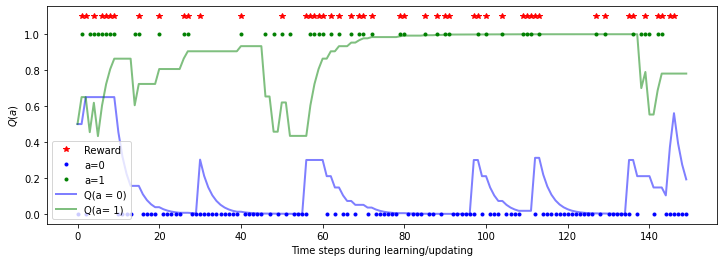

In [182]:
alpha = 0.3
beta = 1.5
n = 150
p_a0 = 0.1
p_r = [p_a0, 1-p_a0]
actions, rewards, Qs,prob_as = generate_data_2choice(rng, alpha, beta, n, p_r = p_r)

plot_rl_simulation(actions, rewards, Qs,prob_as)

***
# Simulate four-choice task

4 states (CS1, CS2, CS3, CS4)...

Define reward outcome for each CS pair (i.e. CS1 -> 1 vs. CS2 -> -1)...

Define action as the actual action the monkey chose, with the reward being the lookup in the reward dictionary...

Action updating:
- attempt 1: only update Q for chosen action
- attempt 2: update Q for chosen action, update Q for not-chosen action with small decay (i.e. gamma)

In [ ]:
# r_table = np.matrix(4xN)
# action = given a pair of CSs
#   1) episilon-greedy -- chose the CS with the higher Q-value with probability 1-episilon, chose the other CS with probability episilon 
#   2) softmax
## i.e. if CS1 and CS2 are presented, chose the CS with the highest Q-value
# Q equation still the same = Q(CS, a) <- Q(CS, a) + alpha * (r[a] - Q(CS,a))

1 ['CS_3' 'CS_1'] [0.0, 0.0, 0.0, 0.0, 0.0] 1.0 1.0 0.6321 CS_3 0
2 ['CS_4' 'CS_1'] [0.0, 0.0, 0.0, 0.0, 0.0] 1.0 1.0 0.6321 CS_4 0
3 ['CS_4' 'CS_5'] [0.0, 0.0, 0.0, 0.0, 0.0] 1.0 1.0 0.6321 CS_4 0
4 ['CS_1' 'CS_3'] [0.0, 0.0, 0.0, 0.0, 0.0] 1.0 1.0 0.6321 CS_1 2
5 ['CS_1' 'CS_3'] [1.0, 0.0, 0.0, 0.0, 0.0] 0.2231 1.0 0.6321 CS_1 2
6 ['CS_5' 'CS_4'] [1.5, 0.0, 0.0, 0.0, 0.0] 1.0 1.0 0.6321 CS_5 -2
7 ['CS_3' 'CS_4'] [1.5, 0.0, 0.0, 0.0, -1.0] 1.0 1.0 0.6321 CS_3 0
8 ['CS_2' 'CS_1'] [1.5, 0.0, 0.0, 0.0, -1.0] 0.1054 1.0 0.1 CS_1 2
9 ['CS_5' 'CS_1'] [1.75, 0.0, 0.0, 0.0, -1.0] 0.0724 4.4817 0.0699 CS_1 2
10 ['CS_3' 'CS_1'] [1.875, 0.0, 0.0, 0.0, -1.0] 0.0601 1.0 0.0583 CS_1 2
11 ['CS_2' 'CS_5'] [1.9375, 0.0, 0.0, 0.0, -1.0] 1.0 4.4817 0.9887 CS_2 1
12 ['CS_2' 'CS_5'] [1.9375, 0.5, 0.0, 0.0, -1.0] 0.4724 4.4817 0.9887 CS_2 1
13 ['CS_5' 'CS_4'] [1.9375, 0.75, 0.0, 0.0, -1.0] 1.0 4.4817 0.6321 CS_5 -2
14 ['CS_1' 'CS_4'] [1.9375, 0.75, 0.0, 0.0, -1.5] 0.0547 1.0 0.6321 CS_1 2
15 ['CS_3' 'CS_1'

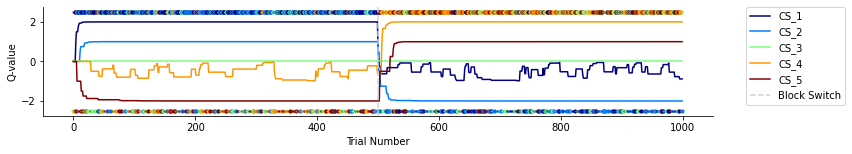

In [179]:
from collections import defaultdict
import random

cs_list = ['CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5']
r_table_preswitch = {'CS_1': 2, 'CS_2': 1, 'CS_3': 0, 'CS_4': -1, 'CS_5': -2}
p_r_table_preswitch = {'CS_1': 1, 'CS_2': 1, 'CS_3': 1, 'CS_4': 0.5, 'CS_5': 1}
r_table_postswitch = {'CS_1': -1, 'CS_2': -2, 'CS_3': 0, 'CS_4': 2, 'CS_5': 1}
p_r_table_postswitch = {'CS_1': 0.5, 'CS_2': 1, 'CS_3': 1, 'CS_4': 1, 'CS_5': 1}
switch_trial = 500

# get values from jet colormap
cmap = plt.cm.jet_r
colors = cmap(np.linspace(0, 1, len(set(cs_list))))
color_keys = sorted(set(cs_list), reverse=True)
color_dict = dict(zip(color_keys, colors))

def generate_data_4choice(alpha, beta, cs_list, n=100, verbose=True):
  # array of actions and rewards
  actions = []
  rewards = []
  cs_pairs_list = []
  action_prob = []
  cs_large_r = []
  cs_small_r = []

  # create a table store the update process of q-value, which has two actions, four states.
  Qs = defaultdict(list)
  for cs in cs_list:
    Qs[cs] = np.zeros(n)

  for i in np.arange(1, n): # for n-steps learning(q-value updating)

    # Randomly select 2 CS from cs_list
    cs_pair = np.random.choice(cs_list, 2, replace=False)
    cs_pairs_list.append(cs_pair)

    # Get Q-values for each CS
    Q_1 = Qs[cs_pair[0]][i-1]
    Q_2 = Qs[cs_pair[1]][i-1]

    # Determine which CS has the higher Q-value
    if Q_1 >= Q_2:
      cs_large = cs_pair[0]
      cs_small = cs_pair[1]
      Q_large = Q_1
      Q_small = Q_2
    else:
      cs_large = cs_pair[1]
      cs_small = cs_pair[0]
      Q_large = Q_2
      Q_small = Q_1

    # prob_a: action-selecion probability, based on Softmax transformation
    ## probability of choosing the CS with the higher Q-value
    exp_Q_large = np.exp(-beta*Q_large)  # beta 
    exp_Q_small = np.exp(-beta*Q_small)  # beta
    # exp_Q_other = [np.exp(-beta*Q_cs) for cs, Q_cs in Qs.items() if cs != cs_large]
    # softmax to calculate probability of choosing the CS with the higher Q-value
    prob_a = 1 - (exp_Q_large / (exp_Q_large+exp_Q_small))

    # Simulate choice based on prob_a
    choice = random.random()
    if choice < prob_a:
      a = cs_large
      Q = Q_large
    else:
      a = cs_small
      Q = Q_small

    prob_a = 1 - np.exp(-beta*Q_1)/(np.sum(np.exp(-beta*Q_1 + np.exp(-beta*Q_2))))

    # Simulate choice based on prob_a
    choice = random.random()
    if choice < prob_a:
      a = cs_pair[0]
      Q = Q_1
    else:
      a = cs_pair[1]  
      Q = Q_2

    action_prob.append(prob_a)
    # calculate reward for action based on r_table
    p_r = random.random()
    if i < switch_trial:
      r_table = r_table_preswitch
      p_r_table = p_r_table_preswitch
    else:
      r_table = r_table_postswitch
      p_r_table = p_r_table_postswitch

    # Simulate reward based on p_r, and action
    if p_r < p_r_table[a]:
        r = r_table[a]
    else:
      r = 0

    # add larger reward cs to list
    cs_large_r.append(r_table[cs_large])
    cs_small_r.append(r_table[cs_small])

    if verbose:
      print(i, cs_pair, [round(Qs[cs][i-1], 4) for cs in cs_list], 
            # Q_large, Q_small, 
            round(exp_Q_large, 4), round(exp_Q_small, 4),
            round(prob_a, 4), a, r)

    # Update Q table for chosen action
    Qs[a][i] = Q + alpha * (r - Q)

    # Retain values for all non-chosen actions
    for cs in cs_list:
      if cs != a:
        Qs[cs][i] = Qs[cs][i-1]

    # Store values
    actions.append(a)
    rewards.append(r)

  return cs_pairs_list, actions, action_prob, rewards, Qs

alpha = 0.5
beta = 1.5
cs_pairs_list, actions, action_prob, rewards, Qs = \
  generate_data_4choice(alpha, beta, cs_list, n=1000, verbose=True)

f, ax = plt.subplots(figsize=(12,2))
for cs in Qs.keys():
  plt.plot(Qs[cs], label=cs, color=color_dict[cs])

# get max abs value of Qs
max_abs = np.max(np.abs([Qs[cs] for cs in Qs.keys()])) + 0.5

# plot scatter of each trial cs pair and action
for i in range(len(cs_pairs_list)):
  cs_pair = cs_pairs_list[i]
  cs_1 = cs_pair[0]
  cs_2 = cs_pair[1]
  action = actions[i]
  if i < switch_trial:
    r_table = r_table_preswitch
  else:
    r_table = r_table_postswitch
  if r_table[cs_1] > r_table[cs_2]:
    if action == cs_1:
      s1 = 10
      s2 = 1
    else:
      s1 = 1
      s2 = 10
    plt.scatter(i, max_abs, marker='o', color=color_dict[cs_1], s=s1)
    plt.scatter(i, -1*max_abs, marker='o', color=color_dict[cs_2], s=s2)
  else:
    if action == cs_2:
      s2 = 10
      s1 = 1
    else:
      s2 = 1
      s1 = 10
    plt.scatter(i, max_abs, marker='o', color=color_dict[cs_2], s=s2)
    plt.scatter(i, -1*max_abs, marker='o', color=color_dict[cs_1], s=s1)

plt.axvline(x=switch_trial, c='lightgrey', linestyle='--', label='Block Switch')
plt.xlabel('Trial Number')
plt.ylabel('Q-value')
# turn off splines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [184]:
# what is Q value for trial 40
print(cs_pairs_list[40])
for cs in Qs.keys():
  print('  ', cs, Qs[cs][40])

print(f'  prob a[1]: {action_prob[40]}')
print(f'  action: {actions[40]}')
print(f'  outcome: {rewards[40]}')

['CS_1' 'CS_3']
   CS_1 1.999755859375
   CS_2 0.9990234375
   CS_3 0.0
   CS_4 -0.5625
   CS_5 -1.9375
  prob a[1]: 0.3678794411714423
  action: CS_1
  outcome: 2


## RL for 4-choice
Potentially add alpha for large vs. small 

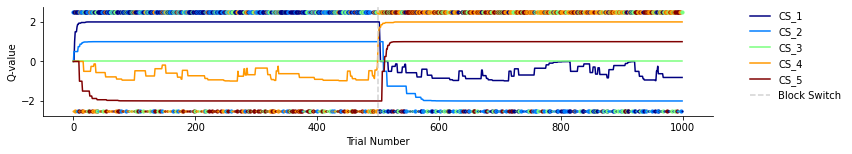

In [183]:
from collections import defaultdict
import random

cs_list = ['CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5']
r_table_preswitch = {'CS_1': 2, 'CS_2': 1, 'CS_3': 0, 'CS_4': -1, 'CS_5': -2}
p_r_table_preswitch = {'CS_1': 1, 'CS_2': 1, 'CS_3': 1, 'CS_4': 0.5, 'CS_5': 1}
r_table_postswitch = {'CS_1': -1, 'CS_2': -2, 'CS_3': 0, 'CS_4': 2, 'CS_5': 1}
p_r_table_postswitch = {'CS_1': 0.5, 'CS_2': 1, 'CS_3': 1, 'CS_4': 1, 'CS_5': 1}
switch_trial = 500

# get values from jet colormap
cmap = plt.cm.jet_r
colors = cmap(np.linspace(0, 1, len(set(cs_list))))
color_keys = sorted(set(cs_list), reverse=True)
color_dict = dict(zip(color_keys, colors))

def generate_data_4choice(alpha, beta, cs_list, n=100, verbose=True):
  # array of actions and rewards
  actions = []
  rewards = []
  cs_pairs_list = []
  action_prob = []
  cs_large_r = []
  cs_small_r = []

  # create a table store the update process of q-value, which has two actions, four states.
  Qs = defaultdict(list)
  for cs in cs_list:
    Qs[cs] = np.zeros(n)

  for i in np.arange(1, n): # for n-steps learning(q-value updating)

    # Randomly select 2 CS from cs_list
    cs_pair = np.random.choice(cs_list, 2, replace=False)
    cs_pairs_list.append(cs_pair)

    # Get Q-values for each CS
    Q_1 = Qs[cs_pair[0]][i-1]
    Q_2 = Qs[cs_pair[1]][i-1]

    prob_a_q1 = np.exp(-beta*Q_1)/(np.sum(np.exp(-beta*Q_1 + np.exp(-beta*Q_2))))
    prob_a_q2 = np.exp(-beta*Q_2)/(np.sum(np.exp(-beta*Q_1 + np.exp(-beta*Q_2))))

    # Simulate choice based on prob_a
    choice = random.random()
    if choice < 1 - prob_a_q1:
      a = cs_pair[0]
      Q = Q_1
    else:
      a = cs_pair[1]  
      Q = Q_2

    action_prob.append(prob_a_q1)
    # calculate reward for action based on r_table
    p_r = random.random()
    if i < switch_trial:
      r_table = r_table_preswitch
      p_r_table = p_r_table_preswitch
    else:
      r_table = r_table_postswitch
      p_r_table = p_r_table_postswitch

    # Simulate reward based on p_r, and action
    if p_r < p_r_table[a]:
        r = r_table[a]
    else:
      r = 0

    # Update Q table for chosen action
    Qs[a][i] = Q + alpha * (r - Q)

    # Retain values for all non-chosen actions
    for cs in cs_list:
      if cs != a:
        Qs[cs][i] = Qs[cs][i-1]

    # Store values
    actions.append(a)
    rewards.append(r)

  return cs_pairs_list, actions, action_prob, rewards, Qs

alpha = 0.5
beta = 1.5
cs_pairs_list, actions, action_prob, rewards, Qs = \
  generate_data_4choice(alpha, beta, cs_list, n=1000, verbose=True)

f, ax = plt.subplots(figsize=(12,2))
for cs in Qs.keys():
  plt.plot(Qs[cs], label=cs, color=color_dict[cs])

# get max abs value of Qs
max_abs = np.max(np.abs([Qs[cs] for cs in Qs.keys()])) + 0.5

# plot scatter of each trial cs pair and action
for i in range(len(cs_pairs_list)):
  cs_pair = cs_pairs_list[i]
  cs_1 = cs_pair[0]
  cs_2 = cs_pair[1]
  action = actions[i]
  if i < switch_trial:
    r_table = r_table_preswitch
  else:
    r_table = r_table_postswitch
  if r_table[cs_1] > r_table[cs_2]:
    if action == cs_1:
      s1 = 10
      s2 = 1
    else:
      s1 = 1
      s2 = 10
    plt.scatter(i, max_abs, marker='o', color=color_dict[cs_1], s=s1)
    plt.scatter(i, -1*max_abs, marker='o', color=color_dict[cs_2], s=s2)
  else:
    if action == cs_2:
      s2 = 10
      s1 = 1
    else:
      s2 = 1
      s1 = 10
    plt.scatter(i, max_abs, marker='o', color=color_dict[cs_2], s=s2)
    plt.scatter(i, -1*max_abs, marker='o', color=color_dict[cs_1], s=s1)

plt.axvline(x=switch_trial, c='lightgrey', linestyle='--', label='Block Switch')
plt.xlabel('Trial Number')
plt.ylabel('Q-value')
# turn off splines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# legend outside of plot with no borders
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)
plt.show()

In [2]:
%reload_ext autoreload
%autoreload 2
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import arviz
import pystan
import nest_asyncio
nest_asyncio.apply()
import multiprocessing
multiprocessing.set_start_method("fork")
# ignore UserWarnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
stan_qf = """
data {
  int<lower=1> T ;               // Number of trials
  int<lower=1,upper=2> a[T];     // Actions (1: Left, 2: Right)
  real r[T];                     // Rewards
}

parameters {
  real<lower=0.0,upper=1.0> alpha;    // Learning rate
  real<lower=0.0,upper=1.0> alpha_F;  // Forgetting rate
  real<lower=0.0> beta;               // Inverse temperature
}

model {
  matrix[2,T] Q; // Action values
  Q[1, 1] = 0;
  Q[2, 1] = 0;
  Q[3, 1] = 0;
  Q[4, 1] = 0;
  
  // Priors
  alpha ~ beta(2, 2);
  alpha_F ~ beta(2, 2);
  beta ~ gamma(2, 3);
  
  // Using 'for' iteration for time-series computation
  for ( t in 1:T ) {
    // Action selection
    // Adding a log-likelihood of a predicted action to "target"
    target += log( 1.0 / ( 1.0 + exp( -beta * (Q[a[t],t] - Q[3-a[t],t]) ) ) );
    
    // Value update
    if (t < T) {
      Q[a[t], t+1] = (1.0 - alpha) * Q[a[t], t] + alpha * r[t]; // Value update for a chosen action
      Q[3-a[t], t+1] = (1.0 - alpha_F) * Q[3-a[t], t];          // Value update for a unchosen action
    }
  }
}
"""

In [6]:
sm = pystan.StanModel(model_code = stan_qf)
#print(sm)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_17756ec0a9c700e13d433a51b0aca029 NOW.
In file included from /var/folders/8z/8tf_3z4d0_1cgj07xk0dtqq00000gn/T/pystan_1_wqcsyo/stanfit4anon_model_17756ec0a9c700e13d433a51b0aca029_1033155792151444718.cpp:840:
In file included from /Users/rahimhashim/miniconda3/envs/rl_oist/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/rahimhashim/miniconda3/envs/rl_oist/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/rahimhashim/miniconda3/envs/rl_oist/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929:
/Users/rahimhashim/miniconda3/envs/rl_oist/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file

In [7]:
from rl_utils import select_session
# Set paths
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
VIDEO_ROOT = os.path.join(ROOT, 'tasks', 'rhAirpuff', '8. Probabilistic_Reward_Airpuff_Choice', 'videos')
SESSION_ROOT = os.path.join(ROOT, 'data', 'processed', 'processed_Probabilistic_Reward_Airpuff_Choice')

# Select session
DATE = '230626'
MONKEY = 'Aragorn'

session_df = select_session(SESSION_ROOT, DATE, MONKEY, correct_only=False)
session_df_correct = session_df[session_df['correct'] == 1]
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]

# set a new field if the block changes
session_df_choice['block_change'] = session_df_choice['block'].diff().fillna(0)

# set a new field for valence not chosen
def valence_field(trial):
  """Generate valence field for session"""
  valence_left = trial['valence_1']
  valence_right = trial['valence_2']
  valence_chosen = trial['valence']
  if valence_chosen == valence_left:
    valence_not_chosen = valence_right
  else:
    valence_not_chosen = valence_left
  trial['valence'] = valence_chosen
  trial['valence_not_chosen'] = valence_not_chosen
  return trial

session_df_choice = session_df_choice.apply(valence_field, axis=1)

def action_field(trial):
  """Generate action field for session"""
  valence_left = trial['valence_1']
  valence_right = trial['valence_2']
  valence_chosen = trial['valence']

  action = 0
  if valence_left > valence_right:
    if valence_chosen == valence_left:
      action = 1
    else:
      action = 0
  elif valence_left < valence_right:
    if valence_chosen == valence_right:
      action = 1
    else:
      action = 0
  trial['action'] = action
  return trial

session_df_choice = session_df_choice.apply(action_field, axis=1)

actions = session_df_choice['action'].values
# actions flip 0s and 1s
actions_inverse = np.abs(actions - 1)
rewards = session_df_choice['reward'].values
valences = session_df_choice['valence'].values
valences_not_chosen = session_df_choice['valence_not_chosen'].values
# larger of the two valences
valences_max = np.maximum(valences, valences_not_chosen)
session_df_choice['valences_max'] = valences_max
# smaller of the two valences
valences_min = np.minimum(valences, valences_not_chosen)
session_df_choice['valences_min'] = valences_min

ModuleNotFoundError: No module named 'rl_utils'